In [28]:
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [29]:
counts_matrix = scipy.io.mmread("/home/luisas/Desktop/sparse.mtx").T.tocsc()
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))

Counts matrix shape: 46045 rows, 13560 columns


In [30]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
scrub.call_doublets(threshold=0.25)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.76
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.4%
Elapsed time: 63.4 seconds
Detected doublet rate = 3.3%
Estimated detectable doublet fraction = 30.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.6%


array([False, False, False, ..., False, False, False])

Running UMAP...


/home/luisas/.local/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../.local/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


Done


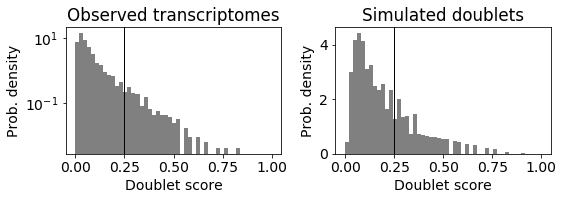

In [31]:
scrub.plot_histogram();
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done')

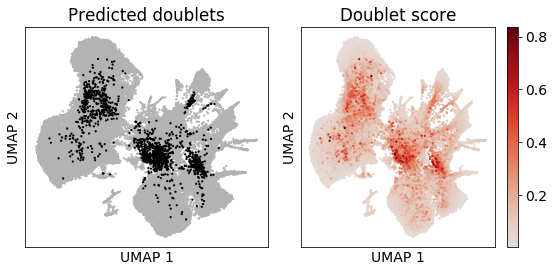

In [32]:
scrub.plot_embedding('UMAP', order_points=True);

In [33]:
np.savetxt('/home/luisas/Desktop/predicted_doublet_mask.txt', scrub.predicted_doublets_, fmt='%s')
np.savetxt('/home/luisas/Desktop/predicted_doublet_scores.txt', scrub.doublet_scores_obs_, fmt='%s')